In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
file_path = r'C:\Users\DELL\Desktop\EDA作业\data.xlsx'
df = pd.read_excel(file_path)

In [16]:
X = df[['Duty rate ', 'VAT ', 'OPEC ', 'OPEC1week', 'OPEC1month', 'CrudeOil', 'CrudeOil1week', 'CrudeOil1month',
        'BCrudeOil', 'BCrudeOil1week', 'BCrudeOil1month', 'GDPUSD', 'GDPEUR', 'GDPCNY', 'GDPJPY', 'Average  rainfall ',
        'Average temperatures', 'Carbon budget', 'Wind Sum', 'Solar Sum', 'gasprice', 'GDP Growth', 'Inflation Rate',
        'Unemployment Rate', 'Total annual registrations']]
y = df[' ULSP:  Pump price (p/litre)']

In [17]:
df['Month'] = df['DATE'].dt.month

In [18]:
train_data = df[df['Month'] <= 10]
test_data = df[df['Month'] > 10]

X_train = train_data[['Duty rate ', 'VAT ', 'OPEC ', 'OPEC1week', 'OPEC1month', 'CrudeOil', 'CrudeOil1week',
                      'CrudeOil1month', 'BCrudeOil', 'BCrudeOil1week', 'BCrudeOil1month', 'GDPUSD', 'GDPEUR', 'GDPCNY',
                      'GDPJPY', 'Average  rainfall ', 'Average temperatures', 'Carbon budget', 'Wind Sum', 'Solar Sum',
                      'gasprice', 'GDP Growth', 'Inflation Rate', 'Unemployment Rate', 'Total annual registrations']]
y_train = train_data[' ULSP:  Pump price (p/litre)']
X_test = test_data[['Duty rate ', 'VAT ', 'OPEC ', 'OPEC1week', 'OPEC1month', 'CrudeOil', 'CrudeOil1week',
                    'CrudeOil1month', 'BCrudeOil', 'BCrudeOil1week', 'BCrudeOil1month', 'GDPUSD', 'GDPEUR', 'GDPCNY',
                    'GDPJPY', 'Average  rainfall ', 'Average temperatures', 'Carbon budget', 'Wind Sum', 'Solar Sum',
                    'gasprice', 'GDP Growth', 'Inflation Rate', 'Unemployment Rate', 'Total annual registrations']]
y_test = test_data[' ULSP:  Pump price (p/litre)']

In [19]:
alpha = 0.01  
lasso_model = Lasso(alpha=alpha)

In [20]:
lasso_model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.245e+03, tolerance: 1.205e+01
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01)

In [21]:
y_pred_lasso = lasso_model.predict(X_test)

In [22]:
def calculate_mape(y_true, y_pred_lasso):
    return np.mean(np.abs((y_true - y_pred_lasso) / y_true)) * 100

In [23]:
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Mean Squared Error (Lasso): {mse_lasso}')
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f'Lasso Regression - R²: {r2_lasso}')
mape_linear = calculate_mape(y_test, y_pred_lasso)
print(f'Linear Regression - MAPE: {mape_linear:.2f}%')

Mean Squared Error (Lasso): 9.04865661150226
Lasso Regression - R²: 0.9606598107443881
Linear Regression - MAPE: 1.61%


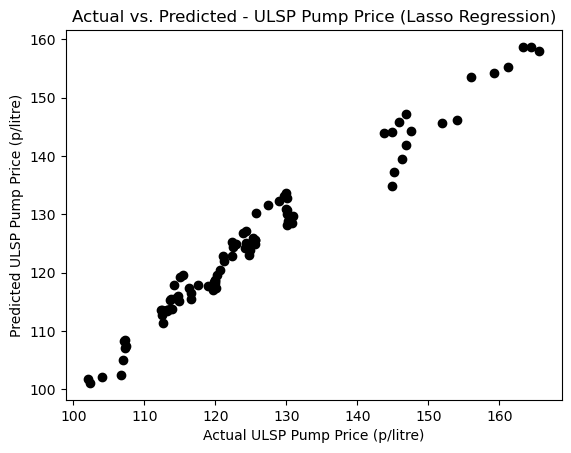

In [11]:
plt.scatter(y_test, y_pred_lasso, color='black')
plt.title('Actual vs. Predicted - ULSP Pump Price (Lasso Regression)')
plt.xlabel('Actual ULSP Pump Price (p/litre)')
plt.ylabel('Predicted ULSP Pump Price (p/litre)')
plt.show()

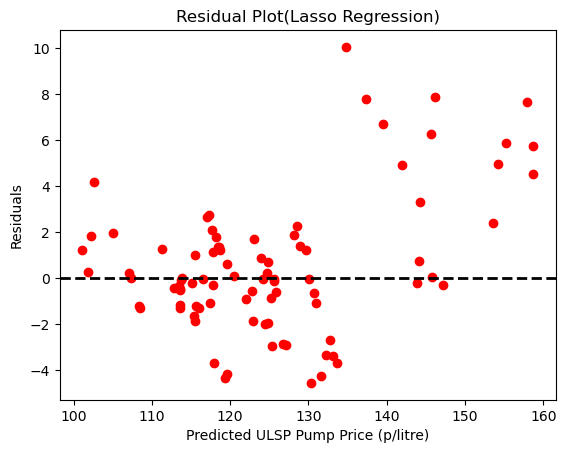

In [12]:
residuals = y_test - y_pred_lasso
plt.scatter(y_pred_lasso, residuals, color='red')
plt.title('Residual Plot(Lasso Regression)')
plt.xlabel('Predicted ULSP Pump Price (p/litre)')
plt.ylabel('Residuals')
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.show()

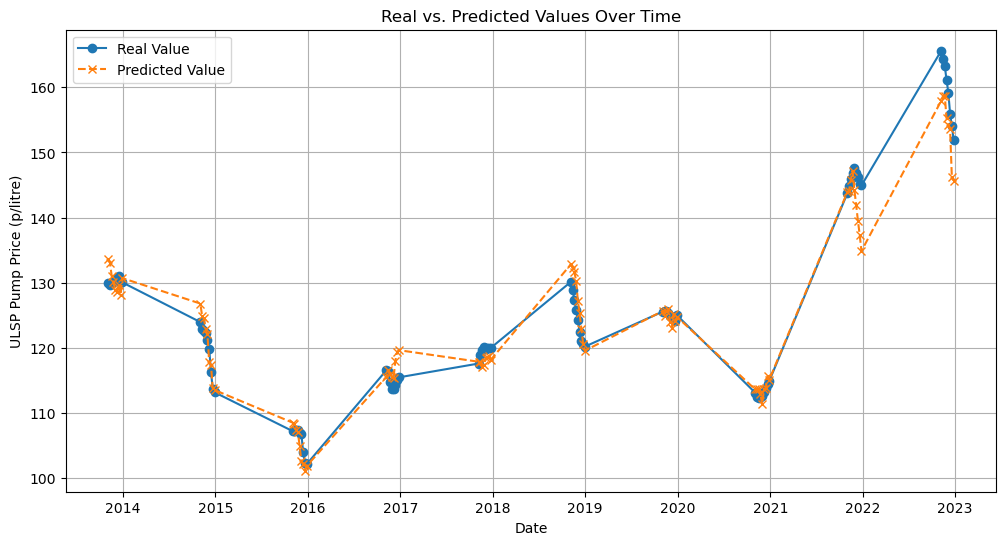

In [28]:
plt.figure(figsize=(12, 6))  
plt.plot(test_data['DATE'], y_test, label='Real Value', marker='o')
plt.plot(test_data['DATE'], y_pred_lasso, label='Predicted Value', linestyle='--', marker='x')
plt.title('Real vs. Predicted Values Over Time')
plt.xlabel('Date')
plt.ylabel('ULSP Pump Price (p/litre)')
plt.legend()
plt.grid(True)

plt.show()